## Support Vector Machine

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("HeartFailure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

In [4]:
X = df.iloc[:,0:12]
y =  df['DEATH_EVENT']

In [5]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [8]:
from sklearn.svm import SVC

svc = SVC(kernel='linear',C=0.1)
svc.fit(X_train,y_train)

SVC(C=0.1, kernel='linear')

In [9]:
svc.score(X_test,y_test)

0.76

In [10]:
from sklearn.metrics import confusion_matrix

y_pred = svc.predict(X_test)
confusion = confusion_matrix(y_test,y_pred)
print(confusion)

[[43  5]
 [13 14]]


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        48
           1       0.74      0.52      0.61        27

    accuracy                           0.76        75
   macro avg       0.75      0.71      0.72        75
weighted avg       0.76      0.76      0.75        75



## Artificial Neural Network

In [54]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes = [100,100], activation='relu', alpha=0.01 , max_iter=10000)
nn.fit(X_train,y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=[100, 100], max_iter=10000)

In [55]:
nn.score(X_test,y_test)

0.64

In [56]:
y_pred = nn.predict(X_test)
confusion = confusion_matrix(y_test,y_pred)
print(confusion)

[[48  0]
 [27  0]]


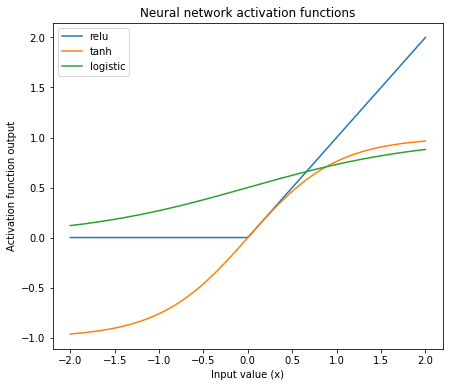

In [18]:
import matplotlib.pyplot as plt

xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

## TensorFlow

In [57]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [59]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd',loss='mean_squared_error')
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs,ys,epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 231ms/step - loss: 0.5676
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5559
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5444
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5332
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5222
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5114
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5009
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4906
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4805
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4707
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4610
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4515
Epoch 13/500
1/1 [==============================] - 0s 2ms/

In [62]:
print(model.predict([4]))

[[6.9983845]]


### Exercise 

In this exercise you'll try to build a neural network that predicts the price of a house according to a simple formula.

So, imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.

Hint: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands' etc.

In [130]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.023),loss='mean_squared_error')

In [131]:
xs = np.arange(1,11,dtype=float)

In [132]:
ys = 0.5+ 0.5* np.arange(1,11,dtype=float)

In [133]:
model.fit(xs,ys,epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 190ms/step - loss: 0.3415
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1981
Epoch 3/500
1/1 [==============================] - 0s 997us/step - loss: 0.1098
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0727
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0751
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0971
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1181
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1267
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1209
Epoch 10/500
1/1 [==============================] - 0s 996us/step - loss: 0.1052
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0858
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0682
Epoch 13/500
1/1 [==============================] - 0s 

In [134]:
model.predict([7])

array([[4.]], dtype=float32)

400.0289 k

## A Computer Vision Example

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])